In [1]:
!unzip set.zip

Archive:  set.zip
   creating: set/
  inflating: set/132539.txt          
  inflating: set/132540.txt          
  inflating: set/132541.txt          
  inflating: set/132543.txt          
  inflating: set/132545.txt          
  inflating: set/132547.txt          
  inflating: set/132548.txt          
  inflating: set/132551.txt          
  inflating: set/132554.txt          
  inflating: set/132555.txt          
  inflating: set/132556.txt          
  inflating: set/132567.txt          
  inflating: set/132568.txt          
  inflating: set/132570.txt          
  inflating: set/132573.txt          
  inflating: set/132575.txt          
  inflating: set/132577.txt          
  inflating: set/132582.txt          
  inflating: set/132584.txt          
  inflating: set/132585.txt          
  inflating: set/132588.txt          
  inflating: set/132590.txt          
  inflating: set/132591.txt          
  inflating: set/132592.txt          
  inflating: set/132595.txt          
  inflating: s

  inflating: set/141387.txt          
  inflating: set/141392.txt          
  inflating: set/141393.txt          
  inflating: set/141395.txt          
  inflating: set/141396.txt          
  inflating: set/141404.txt          
  inflating: set/141406.txt          
  inflating: set/141408.txt          
  inflating: set/141412.txt          
  inflating: set/141413.txt          
  inflating: set/141416.txt          
  inflating: set/141418.txt          
  inflating: set/141420.txt          
  inflating: set/141422.txt          
  inflating: set/141424.txt          
  inflating: set/141426.txt          
  inflating: set/141427.txt          
  inflating: set/141428.txt          
  inflating: set/141429.txt          
  inflating: set/141430.txt          
  inflating: set/141431.txt          
  inflating: set/141432.txt          
  inflating: set/141434.txt          
  inflating: set/141440.txt          
  inflating: set/141441.txt          
  inflating: set/141444.txt          
  inflating:

  inflating: set/150237.txt          
  inflating: set/150238.txt          
  inflating: set/150239.txt          
  inflating: set/150241.txt          
  inflating: set/150244.txt          
  inflating: set/150245.txt          
  inflating: set/150246.txt          
  inflating: set/150247.txt          
  inflating: set/150251.txt          
  inflating: set/150253.txt          
  inflating: set/150263.txt          
  inflating: set/150265.txt          
  inflating: set/150268.txt          
  inflating: set/150272.txt          
  inflating: set/150279.txt          
  inflating: set/150280.txt          
  inflating: set/150283.txt          
  inflating: set/150284.txt          
  inflating: set/150285.txt          
  inflating: set/150287.txt          
  inflating: set/150289.txt          
  inflating: set/150290.txt          
  inflating: set/150292.txt          
  inflating: set/150300.txt          
  inflating: set/150303.txt          
  inflating: set/150305.txt          
  inflating:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [52]:
COMMON_PARAMS = ('RecordID', 'Age', 'Gender', 'Height', 'ICUType')

In [2]:
target = pd.read_csv('Outcomes_для_С1.txt', sep=',')

In [3]:
target

,RecordID,Survival,In-hospital_death
0,132539,-1,0
1,132540,-1,0
2,132541,-1,0
3,132543,575,0
4,132545,918,0
...,...,...,...
7995,152849,752,0
7996,152851,39,0
7997,152858,334,0
7998,152862,-1,0


Посмотрим на количество единиц в `In-hospital_death`

In [10]:
target['In-hospital_death'].sum()

1122

Присутсвует дисбаланс, но таргет все-таки не чисто нулевой, как могло показаться в начале

Посмотрим на пару датасетов с данными пациента

In [4]:
df_1 = pd.read_csv('set/132539.txt')
df_1

,Time,Parameter,Value
0,00:00,RecordID,132539.00
1,00:00,Age,54.00
2,00:00,Gender,0.00
3,00:00,Height,-1.00
4,00:00,ICUType,4.00
...,...,...,...
268,47:37,NIMAP,79.33
269,47:37,NISysABP,128.00
270,47:37,RespRate,23.00
271,47:37,Temp,37.80


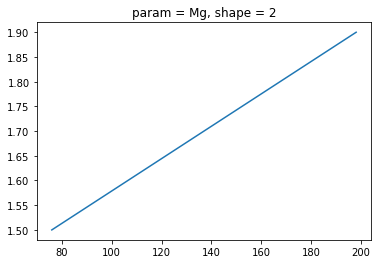

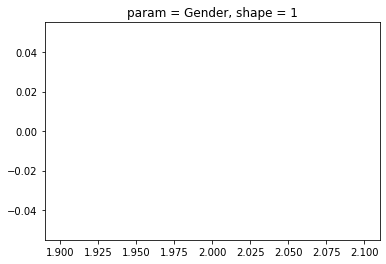

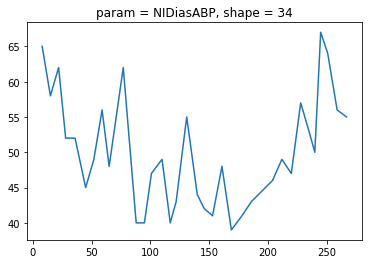

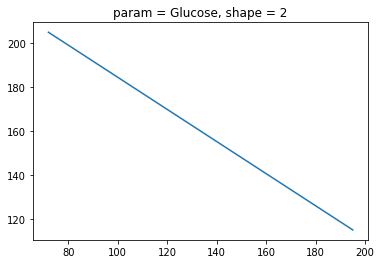

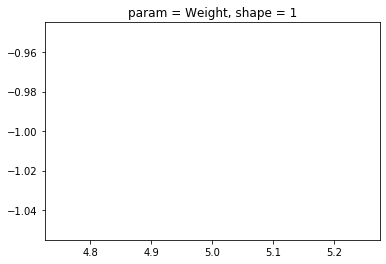

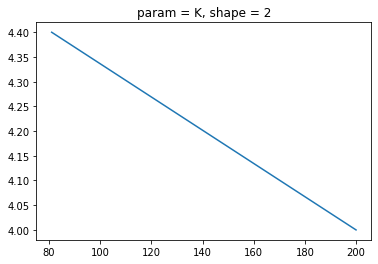

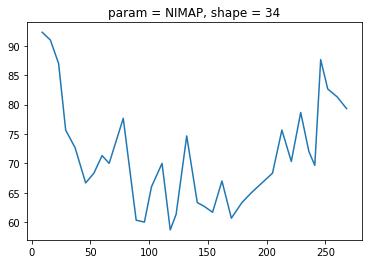

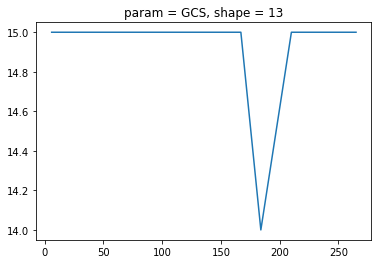

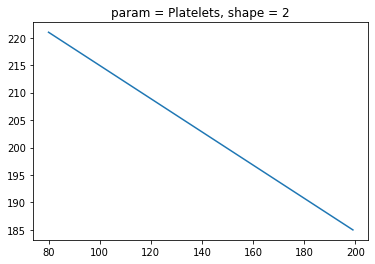

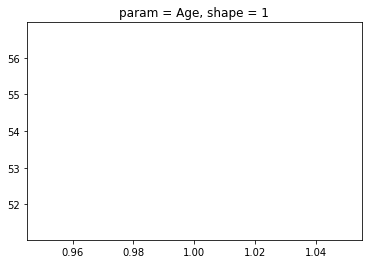

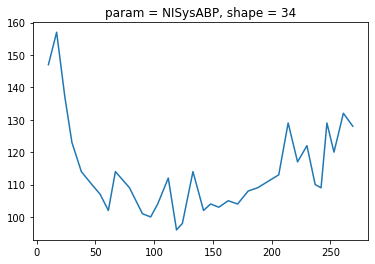

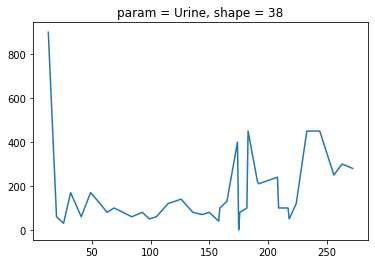

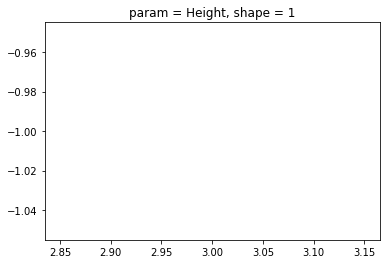

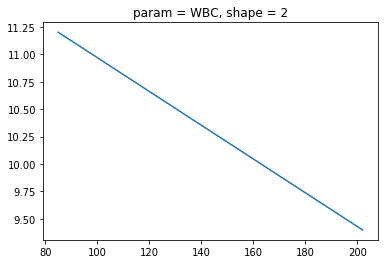

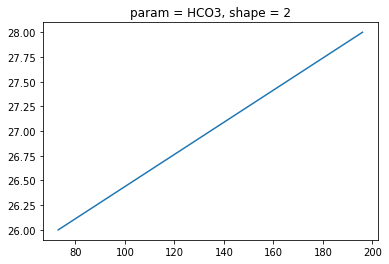

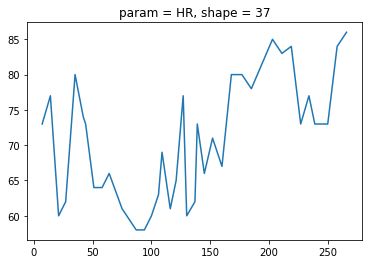

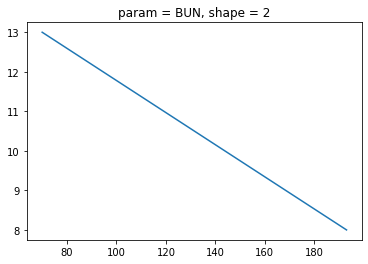

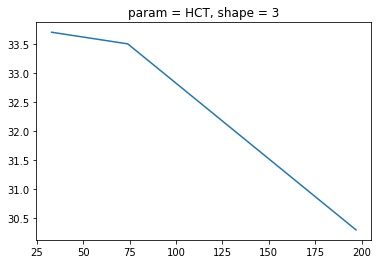

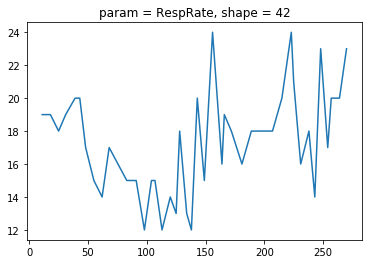

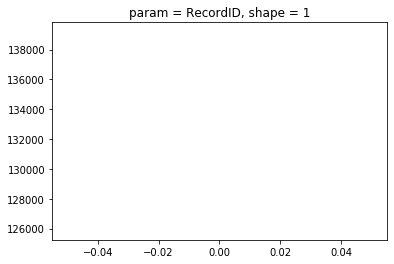

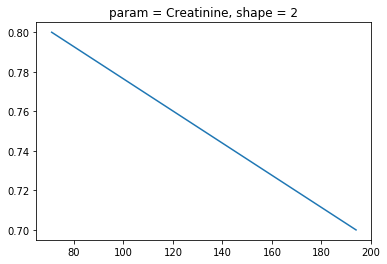

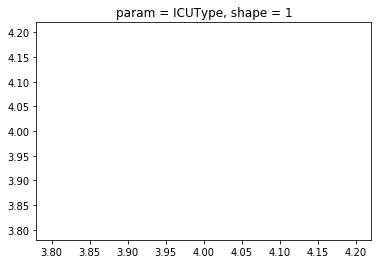

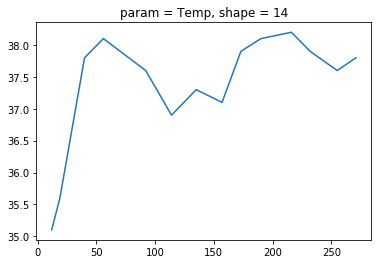

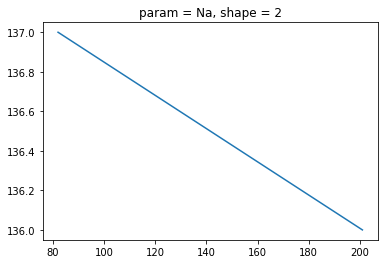

In [65]:
for param in set(df_1['Parameter']):
    test = df_1[df_1.Parameter == param]
    plt.title(f'param = {param}, shape = {test.shape[0]}')
    plt.plot(test['Value'])
    plt.show()

In [45]:
df_2 = pd.read_csv('set/132540.txt')
df_2

,Time,Parameter,Value
0,00:00,RecordID,132540.00
1,00:00,Age,76.00
2,00:00,Gender,1.00
3,00:00,Height,175.30
4,00:00,ICUType,2.00
...,...,...,...
523,47:11,NIMAP,68.33
524,47:11,NISysABP,107.00
525,47:11,Temp,37.10
526,47:11,Urine,220.00


Видно, что засчет того, что пациент может находиться в больнице разное время, количество данных разнится от пациента к пациенту

Создадим датасет, в котором в качестве ключа будет номер пациента, а в качестве полей перцентили его параметров. Очевидно, что в данных будут присуствовать пропуски, потому что у пациентов снимают не все параметры, но данные пропуски можно будет заменить средним значением параметра, скорее всего оно будет близко к показаниям здорового человека

In [78]:
result_df = pd.DataFrame()

for record_id in tqdm(target['RecordID']):
    #df = pd.read_csv(f'set/{str(record_id)}.txt')
    #for row in df.itertuples():
    #    result_df.loc[record_id, f'{row[1]}_{row[2]}'] = row[3]
    
    df = pd.read_csv(f'set/{str(record_id)}.txt')
    
    for param in set(df['Parameter']):
        if param not in COMMON_PARAMS:
            arr = np.array(df[df['Parameter'] == param]['Value'])
            for q in range(0, 101, 5):
                result_df.loc[record_id, f'{param}_{str(q)}%'] = np.percentile(arr, q)
        else:
            result_df.loc[record_id, param] = (df[df['Parameter'] == param]['Value']).values[0]
    
    for param in ('Survival', 'In-hospital_death'):
        result_df.loc[record_id, param] = (
            target[target['RecordID'] == record_id][param]
        ).values[0]

100%|██████████████████████████████████████████████████████████████████████████████| 8000/8000 [21:51<00:00,  6.10it/s]


In [79]:
result_df

,HCT_0%,HCT_5%,HCT_10%,HCT_15%,HCT_20%,HCT_25%,HCT_30%,HCT_35%,HCT_40%,HCT_45%,...,TroponinT_55%,TroponinT_60%,TroponinT_65%,TroponinT_70%,TroponinT_75%,TroponinT_80%,TroponinT_85%,TroponinT_90%,TroponinT_95%,TroponinT_100%
132539,30.3,30.620,30.94,31.260,31.58,31.900,32.22,32.540,32.86,33.180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132540,24.7,26.060,27.42,28.120,28.16,28.200,28.44,28.680,28.80,28.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132541,26.7,27.060,27.42,27.780,28.14,28.500,28.54,28.580,28.62,28.660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132543,36.1,36.130,36.16,36.190,36.22,36.250,36.28,36.350,36.50,36.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132545,22.6,24.500,26.40,28.300,30.20,30.250,30.30,30.350,30.40,30.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152849,25.0,25.675,26.35,27.025,27.70,28.375,29.05,29.505,29.52,29.535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152851,26.6,26.845,27.09,27.355,27.74,28.125,28.48,28.760,29.04,29.320,...,0.15,0.15,0.15,0.15,0.15,0.16,0.17,0.18,0.19,0.2
152858,29.1,29.300,29.50,29.700,29.90,30.100,30.30,30.500,30.70,30.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152862,30.4,30.410,30.42,30.430,30.44,30.450,30.46,30.470,30.48,30.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на процент пропущенных значений

In [111]:
result_df.isna().sum().sum() / result_df.shape[0] / result_df.shape[1]

0.2732912946428572

Удалим те столбцы, для которых пропусков больше чем половина, т.к. они скорее являются шумом, чем полезными данными

In [112]:
number_nan = result_df.isna().sum()

In [113]:
columns_to_drop = number_nan[number_nan > 4000].keys()

In [114]:
clear_result_df = result_df.drop(columns=columns_to_drop)

In [115]:
clear_result_df.isna().sum().sum() / clear_result_df.shape[0] / clear_result_df.shape[1]

0.12449542682926829

In [105]:
clear_result_df

,HCT_0%,HCT_5%,HCT_10%,HCT_15%,HCT_20%,HCT_25%,HCT_30%,HCT_35%,HCT_40%,HCT_45%,...,Lactate_55%,Lactate_60%,Lactate_65%,Lactate_70%,Lactate_75%,Lactate_80%,Lactate_85%,Lactate_90%,Lactate_95%,Lactate_100%
132539,30.3,30.620,30.94,31.260,31.58,31.900,32.22,32.540,32.86,33.180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132540,24.7,26.060,27.42,28.120,28.16,28.200,28.44,28.680,28.80,28.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132541,26.7,27.060,27.42,27.780,28.14,28.500,28.54,28.580,28.62,28.660,...,1.360,1.42,1.480,1.54,1.6,1.66,1.72,1.78,1.84,1.9
132543,36.1,36.130,36.16,36.190,36.22,36.250,36.28,36.350,36.50,36.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132545,22.6,24.500,26.40,28.300,30.20,30.250,30.30,30.350,30.40,30.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152849,25.0,25.675,26.35,27.025,27.70,28.375,29.05,29.505,29.52,29.535,...,1.100,1.10,1.100,1.10,1.1,1.10,1.10,1.10,1.10,1.1
152851,26.6,26.845,27.09,27.355,27.74,28.125,28.48,28.760,29.04,29.320,...,5.080,5.64,5.760,5.80,5.8,5.92,6.04,6.16,6.44,6.8
152858,29.1,29.300,29.50,29.700,29.90,30.100,30.30,30.500,30.70,30.900,...,1.400,1.40,1.400,1.40,1.4,1.40,1.40,1.40,1.40,1.4
152862,30.4,30.410,30.42,30.430,30.44,30.450,30.46,30.470,30.48,30.490,...,4.500,4.50,4.500,4.50,4.5,4.50,4.50,4.50,4.50,4.5


Оставшиеся пропуски заменим средним значением по столбцу

In [108]:
final_df = clear_result_df.fillna(clear_result_df.mean())

In [109]:
final_df

,HCT_0%,HCT_5%,HCT_10%,HCT_15%,HCT_20%,HCT_25%,HCT_30%,HCT_35%,HCT_40%,HCT_45%,...,Lactate_55%,Lactate_60%,Lactate_65%,Lactate_70%,Lactate_75%,Lactate_80%,Lactate_85%,Lactate_90%,Lactate_95%,Lactate_100%
132539,30.3,30.620,30.94,31.260,31.58,31.900,32.22,32.540,32.86,33.180,...,2.365707,2.435876,2.509506,2.584937,2.661287,2.742322,2.830024,2.926155,3.026476,3.129045
132540,24.7,26.060,27.42,28.120,28.16,28.200,28.44,28.680,28.80,28.800,...,2.365707,2.435876,2.509506,2.584937,2.661287,2.742322,2.830024,2.926155,3.026476,3.129045
132541,26.7,27.060,27.42,27.780,28.14,28.500,28.54,28.580,28.62,28.660,...,1.360000,1.420000,1.480000,1.540000,1.600000,1.660000,1.720000,1.780000,1.840000,1.900000
132543,36.1,36.130,36.16,36.190,36.22,36.250,36.28,36.350,36.50,36.650,...,2.365707,2.435876,2.509506,2.584937,2.661287,2.742322,2.830024,2.926155,3.026476,3.129045
132545,22.6,24.500,26.40,28.300,30.20,30.250,30.30,30.350,30.40,30.500,...,2.365707,2.435876,2.509506,2.584937,2.661287,2.742322,2.830024,2.926155,3.026476,3.129045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152849,25.0,25.675,26.35,27.025,27.70,28.375,29.05,29.505,29.52,29.535,...,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000
152851,26.6,26.845,27.09,27.355,27.74,28.125,28.48,28.760,29.04,29.320,...,5.080000,5.640000,5.760000,5.800000,5.800000,5.920000,6.040000,6.160000,6.440000,6.800000
152858,29.1,29.300,29.50,29.700,29.90,30.100,30.30,30.500,30.70,30.900,...,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000
152862,30.4,30.410,30.42,30.430,30.44,30.450,30.46,30.470,30.48,30.490,...,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000


In [116]:
final_df.to_csv('data.csv')